In [10]:
import matplotlib.pyplot as plt
import json, os
import pandas as pd

In [11]:
from pathlib import Path

def list_files(directory, ext='h5'):
    return [str(file) for file in Path(directory).rglob(f"*.{ext}")]

In [12]:
results = {
    'data': [],
    'total_execution_time (seconds)': [],
    'total_process_memory (MB)': [],
    'throughput_bps': [],
    'sample_persec': []
}
device = 'cpu'

# Read from the total.json file instead of individual files
with open(f'./{device}/total.json', 'r') as input:
    data_list = json.load(input)
    
    for data in data_list:
        results['total_execution_time (seconds)'].append(
            data['total_execution_time (seconds)']
        )
        results['total_process_memory (MB)'].append(
            data['total_process_memory (MB)']
        )
        results['throughput_bps'].append(
            data['throughput_bps']
        )
        results['sample_persec'].append(
            data['sample_persec'][0]
        )
        results['data'].append(data['GB_processed'])

In [13]:
df = pd.DataFrame(results)

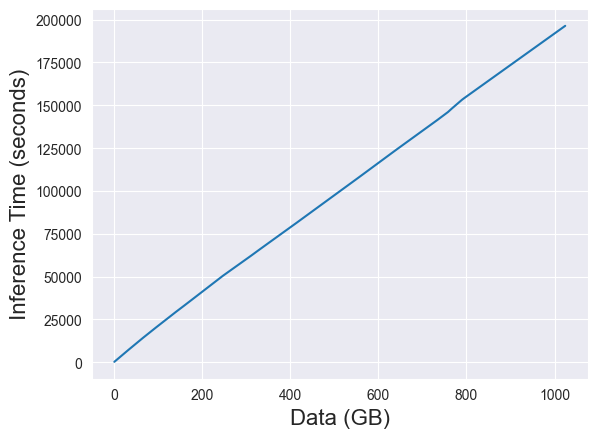

In [14]:
plt.plot(df['data'], df['total_execution_time (seconds)'])
plt.xlabel('Data (GB)', fontsize=16)
plt.ylabel('Inference Time (seconds)', fontsize=16)
plt.savefig(f'./outputs/{device}.jpg', bbox_inches='tight')
plt.show()